# 1. 인공신경망(06.30.화) (핸즈온 p.351)

## 1. Perceptron(퍼셉트론)
       - 다수의 신호를 입력으로 받아 하나의 신호로 출력

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm            # 폰트 지정방법
font_name=fm.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()     
plt.rc('font',family=font_name)


mpl.rcParams['axes.unicode_minus']=False

from sklearn.model_selection import train_test_split

# pip install mglearn
import mglearn
from numpy import linalg




from sklearn.linear_model import LogisticRegression    # 회귀알고리즘
from sklearn.svm import LinearSVC                      # 회귀알고리즘


from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
# AND Gate
# def AND_basic(x1,x2):
#     w1,w2,theta= 0.5, 0.5, 0.7
#     tmp= x1*w1+x2*w2
#     if tmp <= theta:
#         return 0
#     else:
#         return 1 



def AND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.7
    
    tmp=np.sum(w*x)+b
    
    if tmp <= 0:
        return 0
    else:
        return 1
    

In [10]:
inputs=[(0,0),(1,0),(0,1),(1,1)]


for x1,x2 in inputs:
    y=AND(x1,x2)
    print('({x1},{x2}) -> {y}'.format(x1=x1,x2=x2,y=y))

(0,0) -> 0
(1,0) -> 0
(0,1) -> 0
(1,1) -> 1


In [11]:
# OR Gate
def OR(x1,x2):
    x=np.array([x1,x2])
    w=np.array([0.5,0.5])
    b=-0.2
    
    tmp=np.sum(w*x)+b
    
    if tmp <= 0:
        return 0
    else:
        return 1

In [12]:
inputs=[(0,0),(1,0),(0,1),(1,1)]

for x1,x2 in inputs:
    y=OR(x1,x2)
    print('({x1},{x2}) -> {y}'.format(x1=x1,x2=x2,y=y))

(0,0) -> 0
(1,0) -> 1
(0,1) -> 1
(1,1) -> 1


In [13]:
# NAND Gate (AND의 반대)

def NAND(x1,x2):
    x=np.array([x1,x2])
    w=np.array([-0.5,-0.5])
    b=0.7
    
    tmp=np.sum(w*x)+b
    
    if tmp <= 0:
        return 0
    else:
        return 1

In [14]:
inputs=[(0,0),(1,0),(0,1),(1,1)]

for x1,x2 in inputs:
    y=NAND(x1,x2)
    print('({x1},{x2}) -> {y}'.format(x1=x1,x2=x2,y=y))

(0,0) -> 1
(1,0) -> 1
(0,1) -> 1
(1,1) -> 0


In [15]:
# XOR Gate

def XOR(x1,x2):
    s1=NAND(x1,x2)
    s2=OR(x1,x2)
    y=AND(s1,s2)
    
    return y

In [16]:
inputs=[(0,0),(1,0),(0,1),(1,1)]

for x1,x2 in inputs:
    y=XOR(x1,x2)
    print('({x1},{x2}) -> {y}'.format(x1=x1,x2=x2,y=y))

(0,0) -> 0
(1,0) -> 1
(0,1) -> 1
(1,1) -> 0


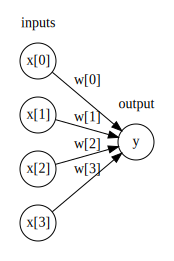

In [17]:
import os
os.environ['PATH'] += os.pathsep+ 'C:\Program Files (x86)\Graphviz2.38\bin'

mglearn.plots.plot_logistic_regression_graph()

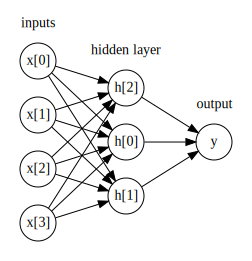

In [18]:
mglearn.plots.plot_single_hidden_layer_graph()   # 히든 계층으로 많은 학습이 이루어진다. 

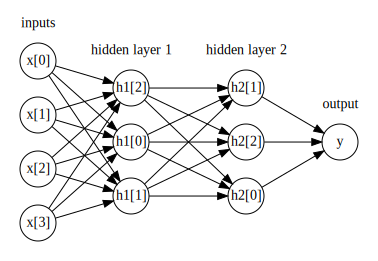

In [19]:
mglearn.plots.plot_two_hidden_layer_graph() 

## 인공신경망을 구현하는 방법
   + 사이킷런 : Perceotron(),MLPClassifier()
   + Theano, Tensorflow, Keras, Pytorch

### Perceptron

In [23]:
# Perceptron : 선형분류만 가능하다.
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int)

In [25]:
X.shape
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
per_clf=Perceptron(max_iter=100,random_state=42)

per_clf.fit(X,y)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=100, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=42, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [29]:
y_pred=per_clf.predict([[2,0.5]])
#y_pred=per_clf.predict([[4,5]])
print(y_pred)

[1]


### MLPClassifier(다중 퍼셉트론)

In [31]:
X=iris['data']
y=iris['target']

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [35]:
# 알고리즘 불러오기
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(10,10,10))

In [37]:
#훈련
mlp.fit(X_train,y_train)

C:\Users\acorn\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [38]:
pred=mlp.predict(X_test)

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[15  0  0]
 [ 0  8  3]
 [ 0  1 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.89      0.73      0.80        11
           2       0.79      0.92      0.85        12

    accuracy                           0.89        38
   macro avg       0.89      0.88      0.88        38
weighted avg       0.90      0.89      0.89        38

